In [84]:
import pandas as pd 
import seaborn as sns
import statsmodels.formula.api as smf
sns.set()

In [90]:
flights = sns.load_dataset("flights")

In [36]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


<AxesSubplot:>

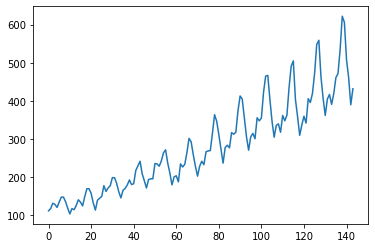

In [8]:
flights.passengers.plot.line()

In [50]:
tabla = flights.pivot_table(values='passengers', index='month', columns='year', aggfunc=sum)
tabla

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


In [56]:
tabla = tabla.div(tabla.sum())
tabla

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,0.073684,0.068616,0.071009,0.072335,0.072593,0.071155,0.071009,0.072100,0.071251,0.074366,0.070039,0.072979
Feb,0.077632,0.075179,0.073457,0.076142,0.072593,0.065574,0.068369,0.070322,0.068084,0.069554,0.066537,0.068428
Mar,0.086842,0.084129,0.087169,0.081641,0.087407,0.081967,0.078345,0.080477,0.080525,0.079178,0.078988,0.073329
Apr,0.084868,0.080549,0.079824,0.076565,0.087037,0.079177,0.078932,0.079462,0.078715,0.076115,0.077043,0.080679
May,0.079605,0.074582,0.084231,0.077411,0.084815,0.081618,0.079225,0.080731,0.080299,0.079396,0.081712,0.082604
Jun,0.088816,0.088902,0.087169,0.092217,0.090000,0.092082,0.092430,0.094948,0.095454,0.095144,0.091829,0.093630
Jul,0.097368,0.101432,0.097453,0.097293,0.097778,0.105337,0.106808,0.104849,0.105180,0.107393,0.106615,0.108855
Aug,0.097368,0.101432,0.097453,0.102369,0.100741,0.102197,0.101819,0.102818,0.105632,0.110455,0.108755,0.106055
Sep,0.089474,0.094272,0.090108,0.088409,0.087778,0.090338,0.091549,0.090124,0.091382,0.088364,0.090078,0.088904


<AxesSubplot:xlabel='month'>

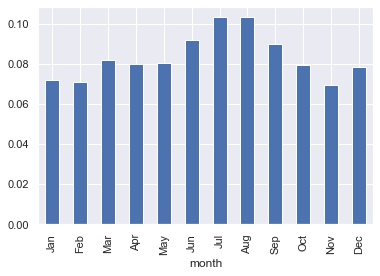

In [60]:
tabla.mean(axis=1).plot.bar()

In [31]:
tabla.sum()

year
1949    1.0
1950    1.0
1951    1.0
1952    1.0
1953    1.0
1954    1.0
1955    1.0
1956    1.0
1957    1.0
1958    1.0
1959    1.0
1960    1.0
dtype: float64

In [148]:
flights = sns.load_dataset("flights")
flights = flights.assign(**{f'passengers{i}': flights['passengers'].shift(i) for i in range(1, 3)})
flights

,year,month,passengers,passengers1,passengers2
0,1949,Jan,112,NaN,NaN
1,1949,Feb,118,112.0,NaN
2,1949,Mar,132,118.0,112.0
3,1949,Apr,129,132.0,118.0
4,1949,May,121,129.0,132.0
...,...,...,...,...,...
139,1960,Aug,606,622.0,535.0
140,1960,Sep,508,606.0,622.0
141,1960,Oct,461,508.0,606.0
142,1960,Nov,390,461.0,508.0


In [151]:
mod = smf.ols(formula='passengers ~ passengers1 + passengers2 + 0', data=flights)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             passengers   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              6284.
Date:                Mon, 21 Dec 2020   Prob (F-statistic):                   8.80e-138
Time:                        00:31:17   Log-Likelihood:                         -694.41
No. Observations:                 142   AIC:                                      1393.
Df Residuals:                     140   BIC:                                      1399.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
passengers1     1.3084      0.081     16.187      0.000       1.149       1.468
passengers2    -0.3116      0.081     -3.834      0.000      -0.472      -0.151
==============================================================================
Omnibus:                        3.853   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                4.071
Skew:                          -0.169   Prob(JB):                        0.131
Kurtosis:                       3.757   Cond. No.                         18.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""